In [1]:
import pandas as pd
import numpy as np
import requests
import tweepy
import json

### Gathering###

In [2]:
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth,wait_on_rate_limit=True,wait_on_rate_limit_notify=True)
#testing for one tweet
#tweet = api.get_status(886265372474843136,tweet_mode='extended')

In [3]:
#import twitter_archive_enhaced  file into a Dataframe
df0=pd.read_csv('twitter-archive-enhanced.csv')

In [4]:
#import image prediction TSV file into a Dataframe
predict0=pd.read_csv('image-predictions.tsv',sep='\t')

In [5]:
#import information of retweet and favorite counts from twitter API 

df_list=[]
i=0
with open('tweet_json.txt','w') as the_file:
   
    
    for tweet_id in df['tweet_id']:

        if i % 100 == 0:
            print("i:{} tweet:{}".format(i, tweet_id))
        i = i + 1
        try:

            tweet = api.get_status(tweet_id,tweet_mode='extended')
            the_file.write(json.dumps(tweet._json)+'\n')
            

        except Exception as e:
            print("error twitter:{}".format(tweet_id))  


i:0 tweet:892420643555336193
error twitter:888202515573088257
error twitter:873697596434513921
i:100 tweet:872820683541237760
error twitter:872668790621863937
error twitter:869988702071779329
error twitter:866816280283807744
error twitter:861769973181624320
i:200 tweet:854010172552949760
error twitter:845459076796616705
error twitter:842892208864923648
error twitter:837012587749474308
i:300 tweet:836753516572119041
error twitter:827228250799742977
i:400 tweet:824775126675836928
i:500 tweet:813112105746448384
error twitter:812747805718642688
error twitter:802247111496568832
i:600 tweet:798673117451325440
i:700 tweet:786233965241827333
error twitter:775096608509886464
i:800 tweet:772615324260794368
error twitter:770743923962707968
i:900 tweet:758740312047005698
Rate limit reached. Sleeping for: 732
error twitter:754011816964026368
i:1000 tweet:747963614829678593
i:1100 tweet:735648611367784448
i:1200 tweet:716730379797970944
i:1300 tweet:707693576495472641
i:1400 tweet:699446877801091073

In [6]:
#retreive favorit and retweet count from tweet_json file and save to a list 
df_list=[]
with open("tweet_json.txt", "r") as lines:
    for line in lines:
        
        print(line.strip())
        js = json.loads(line.strip())
        tweet_id=js['id']
        retweet_count=js['retweet_count']
        favorite_count=js['favorite_count']
        
        df_list.append({'tweet_id':tweet_id,
                        'retweet_count':retweet_count,
                        'favorite_count':favorite_count})

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [7]:
#convert list to dataframe 
df_retweet=pd.DataFrame(df_list,columns=['tweet_id','retweet_count','favorite_count'])

In [8]:
#save data imported from Twitter API as a cvs file and store it on local folder
df_retweet.to_csv("df_retweet.csv",index=True)

In [9]:
#export file and rename it as 'retweet' df
retweet0=pd.read_csv("df_retweet.csv",index_col=0)

### Accessing ###


In [ ]:
#make copies on the original dataframe
retweet=retweet0.copy()
predict=predict0.copy()
df=df0.copy()

In [10]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [11]:
df.tweet_id.duplicated().sum()

0

In [12]:
df.sample(5);

In [13]:
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [14]:
predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [15]:
predict.sample(5);

In [16]:
predict.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [17]:
predict.duplicated().sum()

0

In [18]:
predict.tweet_id.duplicated().sum()

0

In [19]:
retweet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2340 entries, 0 to 2339
Data columns (total 3 columns):
tweet_id          2340 non-null int64
retweet_count     2340 non-null int64
favorite_count    2340 non-null int64
dtypes: int64(3)
memory usage: 73.1 KB


In [20]:
retweet.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8303,37992
1,892177421306343426,6134,32620
2,891815181378084864,4061,24551
3,891689557279858688,8446,41334
4,891327558926688256,9150,39516


In [21]:
retweet.tweet_id.duplicated().sum()

0

In [22]:
df[~df.in_reply_to_status_id.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
149,863079547188785154,6.671522e+17,4.196984e+09,2017-05-12 17:12:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Ladies and gentlemen... I found Pipsy. He may ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/863079547...,14,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
184,856526610513747968,8.558181e+17,4.196984e+09,2017-04-24 15:13:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...","THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/856526610...,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None


In [23]:
#checked on source and mainly composed of iphones,website, vine and tweetdeck
df['source']
i='iphone'
for item in df['source']:
    if  i not in item:
        print(item);
        
#pd.set_option('expand_frame_repr', True)

<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>
<a href="http://vine.c

In [24]:
df['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [25]:
df['text'][30]

'@NonWhiteHat @MayhewMayhem omg hello tanner you are a scary good boy 12/10 would pet with extreme caution'

In [26]:
# If the represented Tweet is a reply, this field will contain the integer representation of the original Tweet’s ID. Example:"in_reply_to_status_id":114749583439036416
df[~df['in_reply_to_status_id'].isnull()];

#patients[patients['address'].isnull()]

## Quality issues

df

1. some tweets are retweets 
2. it is unclea for 'source' column as it is combined a lot of information such as website and unnessary string
3. dog information should be stored a seperate table
4. some retweets are in reply to other tweets with a in_reply_to_status_id 
5. there are some text include "@" and the rating is incorrect for example: numarator is 960 denominator is 0 
6. rating below 10 
7. timestamp format is in year, month, date and time 
8. some dog names are extracted incorrectly 
9. numerator and denominator can be scaled 

predict 

1. dog breed names are not consistant 

- not capitalized for the first letter
- underscore in between each word 
- column names are not clear 

2. types other than dog breeds are included in the dataframe

retweet 

1. retweet_count and favorite_count are float numbers. 
2. if a tweet is a retweet, we do not want to count it in.

## Structure Issues
1. currently, retweet, df and predict are in seperate tables. 
1. the layout for dog types is by columns 
2. retweet and predict information is in a seperate table 
3. does in_reply_to_status_id information nessary in this case? 
4. some information should be saved seperately.
5. display for 'in_reply_to_status_id' is not useful 

## Cleaning



# define - df
1. Delete the rows if the tweets are retweets - delete the rows if retweeted_status_id is True 
2. it is unclea for 'source' column as it is combined a lot of information such as website and unnessary string
3. some retweets are in reply to other tweets with a in_reply_to_status_id 
4. there are some text include "@" and the rating is incorrect for example: numarator is 960 denominator is 0 
5. rating below 10 
6. timestamp format is in year, month, date and time 
7. some dog names are extracted incorrectly 

In [27]:
df.sample(5);

In [28]:
df[df['tweet_id']==864873206498414592]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
141,864873206498414592,NaN,NaN,2017-05-17 16:00:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Please don't send in Jesus....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/864873206...,14,10,None,None,None,None,None


In [29]:
#keep rows if retweeted_status_id is NaN, otherwise delete the ones with status id. 
#keep rows if in_reply_to_status_id is NaN, otherwise delete the ones with status id. 
df=df[pd.isnull(df['retweeted_status_id'])]
df=df[pd.isnull(df['in_reply_to_status_id'])]
df=df.reset_index(drop=True)

In [30]:
df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [31]:
#test;
df['retweeted_status_id'];

## define
strip main source from the string, and rename them to appropriate source name. 


In [32]:
#value counts before clean
df['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1964
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       31
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [33]:
#create a list to store source name component stripped out from string

import re
new_list=[]
for item in df['source']:
    x=re.split('[<>]',item)[2]
    new_list.append(x) 

#store the list to 'source' column    
df['source']=new_list


In [34]:
df['source'].value_counts()

Twitter for iPhone     1964
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

In [35]:
#to have a short name, replace source name from 'Vine- Make a Scene' to 'Vine'
# and from 'Twitter for iPhone' to 'iPhone'
df.replace(to_replace={'source':{'Vine - Make a Scene':'Vine'}},inplace=True)
df.replace(to_replace={'source':{'Twitter for iPhone':'iPhone'}},inplace=True)


In [36]:
#Test
df.head();
df['source'].value_counts()

iPhone                1964
Vine                    91
Twitter Web Client      31
TweetDeck               11
Name: source, dtype: int64

In [37]:
df[df['source']=='Vine']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
415,808344865868283904,NaN,NaN,2016-12-12 16:16:49 +0000,Vine,This is Seamus. He's very bad at entering pool...,NaN,NaN,NaN,https://vine.co/v/5QWd3LZqXxd,11,10,Seamus,None,None,None,None
438,802600418706604034,NaN,NaN,2016-11-26 19:50:26 +0000,Vine,This is Bailey. She has mastered the head tilt...,NaN,NaN,NaN,https://vine.co/v/5FwUWjYaW0Y,11,10,Bailey,None,None,None,None
499,791774931465953280,NaN,NaN,2016-10-27 22:53:48 +0000,Vine,Vine will be deeply missed. This was by far my...,NaN,NaN,NaN,https://vine.co/v/ea0OwvPTx9l,14,10,None,None,None,None,None
510,789903600034189313,NaN,NaN,2016-10-22 18:57:48 +0000,Vine,This is Ralphy. His dreams were just shattered...,NaN,NaN,NaN,https://vine.co/v/5wPT1aBxPQZ,13,10,Ralphy,None,None,pupper,None
532,786286427768250368,NaN,NaN,2016-10-12 19:24:27 +0000,Vine,This is Arnie. He's afraid of his own bark. 12...,NaN,NaN,NaN,https://vine.co/v/5XH0WqHwiFp,12,10,Arnie,None,None,None,None
544,784183165795655680,NaN,NaN,2016-10-07 00:06:50 +0000,Vine,This is Reginald. He's one magical puppo. Aero...,NaN,NaN,NaN,https://vine.co/v/5ghHLBMMdlV,12,10,Reginald,None,None,None,puppo
545,784057939640352768,NaN,NaN,2016-10-06 15:49:14 +0000,Vine,This is Balto. He's very content. Legendary to...,NaN,NaN,NaN,https://vine.co/v/5gKxeUpuKEr,12,10,Balto,None,None,None,None
560,781655249211752448,NaN,NaN,2016-09-30 00:41:48 +0000,Vine,This is Combo. The daily struggles of being a ...,NaN,NaN,NaN,https://vine.co/v/5rt6T3qm7hL,11,10,Combo,doggo,None,None,None
562,781308096455073793,NaN,NaN,2016-09-29 01:42:20 +0000,Vine,"Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",NaN,NaN,NaN,https://vine.co/v/5rgu2Law2ut,12,10,None,doggo,None,pupper,None
572,780074436359819264,NaN,NaN,2016-09-25 16:00:13 +0000,Vine,Here's a doggo questioning his entire existenc...,NaN,NaN,NaN,https://vine.co/v/5nzYBpl0TY2,10,10,None,doggo,None,None,None


## define
display for in_reply_to_status_id and user_id is in float64 format
so for both columns: 

step 1: 
for null values should be converted to string. 
for non-null values 
1. data type should be converted to integer first  
2. then convert to string 
Reason of doing this is to make sure datatype is consistent in a new pd series. 

step 2: apply function above to the df                          

## define
create a function to extract "@name" and delete "@name" from the text column as this information is useless. 

In [38]:
df.text

0       This is Phineas. He's a mystical boy. Only eve...
1       This is Tilly. She's just checking pup on you....
2       This is Archie. He is a rare Norwegian Pouncin...
3       This is Darla. She commenced a snooze mid meal...
4       This is Franklin. He would like you to stop ca...
5       Here we have a majestic great white breaching ...
6       Meet Jax. He enjoys ice cream so much he gets ...
7       When you watch your owner call another dog a g...
8       This is Zoey. She doesn't want to be one of th...
9       This is Cassie. She is a college pup. Studying...
10      This is Koda. He is a South Australian decksha...
11      This is Bruno. He is a service shark. Only get...
12      Here's a puppo that seems to be on the fence a...
13      This is Ted. He does his best. Sometimes that'...
14      This is Stuart. He's sporting his favorite fan...
15      This is Oliver. You're witnessing one of his m...
16      This is Jim. He found a fren. Taught him how t...
17      This i

In [39]:
type(df.text[30])

str

In [40]:
# function to search for @name delete it by replacing with '' in the text message

def trim_atsign(text):
    return re.sub('@\w+','',text)
    

In [41]:
# apply the function above to the text column 
df['text']=df['text'].apply(trim_atsign)


In [42]:
#test
df.text;

## define

update the Denominator to 10 for every single dog as score of 10 is the baseline in this case. 

In [43]:
df['rating_denominator'].value_counts();

In [44]:
df[df['rating_denominator']!=10].head(10);

In [45]:
#df.loc[df['dollars_spent'] > 0, 'purchase'] = 1
#df.loc[df['rating_denominator']!=10,'rating_denominator']=10

In [46]:
#Test
df['rating_denominator'].value_counts()

10     2080
50        3
11        2
80        2
7         1
170       1
150       1
120       1
110       1
90        1
70        1
40        1
20        1
2         1
Name: rating_denominator, dtype: int64

In [47]:
df[df['expanded_urls'].isnull()];

In [48]:
df.loc[ df['expanded_urls'].isnull() , 'expanded_urls' ]='unknown'

In [49]:
df.loc[df['rating_denominator']>10,['rating_numerator','rating_denominator']]

,rating_numerator,rating_denominator
339,84,70
700,165,150
853,9,11
904,204,170
948,4,20
985,50,50
1011,99,90
1036,80,80
1056,45,50
1129,60,50


## define

scale rating numerator and denominator to a normal range; 

for example if the score is 88/80, it should be scaled to (88/8)/(80/8), as baseline for each dog is 10 in this case, the numerator should be divided by same divider. 

In [50]:
df[df['tweet_id']==820690176645140481]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
339,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,iPhone,The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None


In [51]:
# Method 2 for this algorithm 
import math

def scale(row):
    x = row['rating_numerator']
    y = row['rating_denominator']
    if y>0:
        x=math.ceil(x/(y/10))        
    #return pd.Series([x,y,z],['rating_numerator2', 'rating_denominator2','tweet_id2'])
    return x

In [52]:
df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,iPhone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,iPhone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,iPhone,Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,iPhone,Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,iPhone,When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,iPhone,This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,iPhone,This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [53]:
df.apply(scale, axis=1);

In [54]:
df['rating_numerator']=df.apply(scale, axis=1)
df['rating_denominator']=10

In [55]:
df[df['tweet_id']==820690176645140481]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
339,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,iPhone,The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,12,10,None,None,None,None,None


In [56]:
#Test 
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,iPhone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,iPhone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [57]:
df['rating_denominator'].value_counts();

#algorithm to scale denominator to 10 and thus numerator should be scaled by same amount.
#if the result is with point, round up to integer. 
#the output are stored in two seperate lists 

new_numerators = []
new_denominators = []
for index, row in df.iterrows():
    x = row['rating_numerator']
    y = row['rating_denominator']
    if y>10:
        x=math.ceil(x/(y/10)) 
        y=10
    new_numerators.append(x)
    new_denominators.append(y)


In [58]:
print(df[df['tweet_id']==864873206498414592])

               tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
120  864873206498414592                    NaN                  NaN   

                     timestamp  source  \
120  2017-05-17 16:00:15 +0000  iPhone   

                                                  text  retweeted_status_id  \
120  We only rate dogs. Please don't send in Jesus....                  NaN   

     retweeted_status_user_id retweeted_status_timestamp  \
120                       NaN                        NaN   

                                         expanded_urls  rating_numerator  \
120  https://twitter.com/dog_rates/status/864873206...                14   

     rating_denominator  name doggo floofer pupper puppo  
120                  10  None  None    None   None  None  


In [59]:
df[df['rating_numerator']>20].head();

In [60]:
#Test 
df[['rating_denominator','rating_numerator']];

In [61]:
df['rating_numerator'].value_counts().sort_index()

0         1
1         4
2        10
3        19
4        15
5        35
6        32
7        52
8        98
9       154
10      438
11      418
12      490
13      287
14       38
26        1
27        1
35        1
75        1
420       1
1776      1
Name: rating_numerator, dtype: int64

In [62]:
df[df['tweet_id']==864873206498414592]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
120,864873206498414592,NaN,NaN,2017-05-17 16:00:15 +0000,iPhone,We only rate dogs. Please don't send in Jesus....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/864873206...,14,10,None,None,None,None,None


## define

Covert the string value of 'timestamp' column to datetime object

In [63]:
type(df['timestamp'][0])

str

In [64]:
df.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

In [65]:
#first change the datatype of timestamp column to datatime
df.timestamp=pd.to_datetime(df.timestamp)

In [66]:
type(df['timestamp'][0])

pandas._libs.tslib.Timestamp

## define
some dog names are extracted incorrectly 
for example some dogs name are extracted as "quite, a, such..etc" probably due to the fact that dog's name is extracted right after phrases "This is". 
find out the names in this case as many as possible and change to "None" 

In [67]:
# df[['a','b']]
df[['text','name']];

In [68]:
df['name'].value_counts()

None         603
a             55
Lucy          11
Charlie       11
Oliver        10
Cooper        10
Tucker         9
Penny          9
Lola           8
Winston        8
the            8
Sadie          8
Toby           7
Daisy          7
Bella          6
Koda           6
Oscar          6
Jax            6
Bailey         6
Bo             6
an             6
Stanley        6
Louis          5
Bentley        5
Leo            5
Rusty          5
Chester        5
Buddy          5
Scout          5
Dave           5
            ... 
Saydee         1
Betty          1
Scruffers      1
Deacon         1
Einstein       1
William        1
BeBe           1
Grizzwald      1
Jeremy         1
Ron            1
Jeffrie        1
Jennifur       1
Kanu           1
Rover          1
Harper         1
Marty          1
Akumi          1
Spark          1
Andy           1
Balto          1
Dex            1
Rose           1
Baloo          1
Pablo          1
Enchilada      1
Tess           1
Paull          1
Carper        

In [69]:
#Creat a list with names mistaken extracted from the text 
#screen through values in name column, if any wrong names are found, replace with 'none'

x_list=['a','the','an','such','how','quite']

def rename(name):
    if name in x_list:
        return 'None'
    else:
        return name

In [70]:
#apply function above to name column
df['name']=df['name'].apply(rename)

In [71]:
#Test 
df['name'].value_counts();

## Predict table 

## define 
 
1. dog breed names are not consistant 

- not capitalized for the first letter
- underscore in between each word 
- column names are not clear 

2. types other than dog breeds are included in the dataframe

In [72]:
predict.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [73]:
predict['p1'].value_counts();

## define 
dog names in p1,p2,p3 columns need to be modified 
1. substitue '_' to space 
2. Captilize each word 
3. to make dog type names more descriptive, rename headings for the three columns. 

In [74]:
#function to replace '_' to space
import re
def dog_name(text):
    return re.sub('_',' ',text)


In [75]:
#apply function above to p1,p2,p3 columns
predict['p1']=predict['p1'].apply(dog_name)
predict['p2']=predict['p2'].apply(dog_name)
predict['p3']=predict['p3'].apply(dog_name)

In [76]:
#capitalize the dog names for each word
predict['p1']=predict['p1'].str.title()
predict['p2']=predict['p2'].str.title()
predict['p3']=predict['p3'].str.title()


In [77]:
#change p1, p2, p3 to more specific column names 
#df.rename(index=str, columns={"A": "a", "B": "c"})
predict.rename(index=str,columns={"p1":"predict1","p2":"predict2","p3":"predict3"},inplace=True)

In [78]:
#Test 
predict.head();

In [79]:
predict[predict['p1_dog']==False];

## define - retweet


1. information on 'retweeted_status_timestamp' not useful
2. retweet_count and favorite_count are float numbers. No need to change
3. 

In [80]:
retweet=pd.read_csv("df_retweet.csv",index_col=0)

In [81]:
retweet.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8303,37992
1,892177421306343426,6134,32620
2,891815181378084864,4061,24551
3,891689557279858688,8446,41334
4,891327558926688256,9150,39516


In [82]:
retweet['favorite_count'].value_counts();

In [83]:
retweet[retweet['favorite_count'].isnull()]

,tweet_id,retweet_count,favorite_count


In [84]:
#define a function to :find null values and change them to string direcetly.
#find non-null values and change them to integer first and then to string. 

#def convert_float_to_str(x):    
  #  if np.isnan(x):
   #     return "nan"
   # else:        
     #   return str(int(x))


In [85]:
#define a function to :find null values and change them to string direcetly.
#find non-null values and change them to integer first and then to string. 

#retweet['retweet_count']=retweet['retweet_count'].apply(convert_float_to_str)
#retweet['favorite_count']=retweet['favorite_count'].apply(convert_float_to_str)


In [86]:
#
retweet['retweet_count'].astype(float);
retweet['favorite_count'].astype(float)

0       37992.0
1       32620.0
2       24551.0
3       41334.0
4       39516.0
5       19854.0
6       11597.0
7       64094.0
8       27270.0
9       31292.0
10      30076.0
11      27268.0
12      47180.0
13      26624.0
14      14816.0
15      24762.0
16      28548.0
17      25066.0
18      19443.0
19      21336.0
20      29592.0
21      45378.0
22      67676.0
23      33030.0
24      29982.0
25      34458.0
26      11826.0
27      22002.0
28      20790.0
29        116.0
         ...   
2310      437.0
2311      105.0
2312      164.0
2313      185.0
2314      762.0
2315      215.0
2316      287.0
2317      193.0
2318      490.0
2319      143.0
2320      171.0
2321      100.0
2322    14067.0
2323       78.0
2324      151.0
2325      161.0
2326      114.0
2327      316.0
2328      142.0
2329      464.0
2330      108.0
2331      288.0
2332      427.0
2333     1202.0
2334      130.0
2335      106.0
2336      293.0
2337      123.0
2338      124.0
2339     2529.0
Name: favorite_count, Le

In [87]:
#Test
retweet.head();

In [88]:
retweet['retweet_count'].sort_values();

In [89]:
df.head();

In [90]:
predict.head()

,tweet_id,jpg_url,img_num,predict1,p1_conf,p1_dog,predict2,p2_conf,p2_dog,predict3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,0.465074,True,Collie,0.156665,True,Shetland Sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature Pinscher,0.074192,True,Rhodesian Ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature Pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


## Structure 

## Define

1. merge predict and df tables to one as they both refer to one same observation unit. 
2. the merged table should only keep records if tweetid is in predict table as we will only analyze on the ones with pictures. 

In [91]:
len(str(df['tweet_id'][0]))

18

In [92]:
len(str(predict['tweet_id'][0]))

18

In [93]:
df[df['tweet_id']==666020888022790149]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2096,666020888022790149,NaN,NaN,2015-11-15 22:32:08,iPhone,Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [94]:
#merge table from left side (df table in this case) to right side (predict table), 
#the merged table should only include records with tweetid in predict table 
#DataFrame.join(other, on=None, how='left', lsuffix='', rsuffix='', sort=False)
#DataFrame.merge(right, how='inner', on=None, left_on=None, right_on=None, left_index=False, right_index=False, sort=False, suffixes=('_x', '_y'), copy=True, indicator=False, validate=None)

df=df.merge(predict,how='inner',on='tweet_id')

In [95]:
df['retweeted_status_id'];

In [96]:
df=df[pd.isnull(df['retweeted_status_id'])]

In [97]:
#test
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 28 columns):
tweet_id                      1971 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     1971 non-null datetime64[ns]
source                        1971 non-null object
text                          1971 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1971 non-null object
rating_numerator              1971 non-null int64
rating_denominator            1971 non-null int64
name                          1971 non-null object
doggo                         1971 non-null object
floofer                       1971 non-null object
pupper                        1971 non-null object
puppo                         1971 non-null object
jpg_url                       19

## Define
Store tweet status related information in a sperate table as
1. the df needs to be streamlined and those information 
2. those information themselves can form a new observation unit

In [98]:
#create new table with name 'status' and store columns for 'in_reply_to_status_id','in_reply_to_user_id','expanded_urls'
status=df[['in_reply_to_status_id','in_reply_to_user_id','expanded_urls']]

In [99]:
#streamline df by dropping unrelated columns 
#df.drop(['B', 'C'], axis=1)
df=df.drop(['in_reply_to_status_id','in_reply_to_user_id','expanded_urls','retweeted_status_user_id',
        'retweeted_status_id','retweeted_status_timestamp','expanded_urls'],axis=1)

In [100]:
#test
df.head(1);

## Define 

to be more concise,reshape the sections for dog types - columns of 'doggo','floofer','pupper','puppo' to one column. 

Drop the intermediate old columns.

In [101]:
#treatments_clean = pd.melt(treatments_clean, id_vars=['given_name', 'surname', 'hba1c_start', 'hba1c_end', 'hba1c_change'],
                           #var_name='treatment', value_name='dose')
#treatments_clean = treatments_clean[treatments_clean.dose != "-"]
#treatments_clean['dose_start'], treatments_clean['dose_end'] = treatments_clean['dose'].str.split(' - ', 1).str
#treatments_clean = treatments_clean.drop('dose', axis=1)

#df['type']=pd.melt(df,var_name='type',value_vars=['doggo','floofer','pupper','puppo'])['type']


In [102]:
#after investigation, there are cases one dog has two types 
df[(df['doggo']=='doggo') + (df['floofer']=='floofer')]['tweet_id']

/opt/conda/lib/python3.6/site-packages/pandas/core/computation/expressions.py:183: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  unsupported[op_str]))


9       890240255349198849
37      884162670584377345
40      883360690899218434
81      872967104147763200
89      871515927908634625
98      869596645499047938
136     858843525470990336
146     855851453814013952
152     854010172552949760
183     846514051647705089
188     845397057150107648
223     836753516572119041
235     834574053763584002
245     832998151111966721
250     832273440279240704
251     832032802820481025
252     831939777352105988
257     831322785565769729
266     829449946868879360
267     829374341691346946
275     828381636999917570
285     826958653328592898
286     826848821049180160
288     826476773533745153
290     826204788643753985
313     821765923262631936
315     821407182352777218
317     821107785811234820
324     819924195358416896
329     819006400881917954
               ...        
604     768193404517830656
608     767191397493538821
639     760893934457552897
648     759793422261743616
655     758828659922702336
667     757393109802180609
6

In [103]:
#delete records if there are multiple dog types for one dog 
#for example: a dog is both doggo and floofer

df=df[((df['doggo']=='doggo').astype(int) + (df['floofer']=='floofer').astype(int) \
 + (df['pupper']=='pupper').astype(int) +  (df['puppo']=='puppo').astype(int))<=1]

In [104]:
# add a new column named as 'dog_type' with string "None" start with
#classify types as doggo,floofer,pupper,puppo and overwrite the type in 'dog_type' column

df['dog_type'] ="None"

df.loc[df['floofer']=='floofer',['dog_type']]='floofer'
df.loc[df['pupper']=='pupper',['dog_type']]='pupper'
df.loc[df['puppo']=='puppo',['dog_type']]='puppo'
df.loc[df['doggo']=='doggo',['dog_type']]='doggo'

In [105]:
#def dog_type(row):
   # if row['doggo']=='doggo':
        #return 'doggo'
  #  if row['floofer']=='floofer'

In [106]:
#drop the intermediate old types 
df.drop(['doggo','floofer','pupper','puppo'], axis=1,inplace=True)

In [107]:
#Test
df['dog_type'].value_counts()

None       1668
pupper      201
doggo        63
puppo        22
floofer       7
Name: dog_type, dtype: int64

In [108]:
df['dog_type'].value_counts()

None       1668
pupper      201
doggo        63
puppo        22
floofer       7
Name: dog_type, dtype: int64

## Define
1.reweet table should be merged as we want to analyze on the impact caused by retweets counts and favourite counts.
2. drop the rows if there are no retweet_count or favorite_counts.

In [109]:
#df=df.merge(predict,how='inner',on='tweet_id')
#DataFrame.merge(right, how='inner', on=None, left_on=None, right_on=None, left_index=False, right_index=False, sort=False, suffixes=('_x', '_y'), copy=True, indicator=False, validate=None)
df=df.merge(retweet,how='left',on='tweet_id')

In [110]:
#delete the rows if there is no retweet_count as the tweet is not available anymore. 
df=df[~df['retweet_count'].isnull()]

In [111]:
#test
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1959 entries, 0 to 1960
Data columns (total 21 columns):
tweet_id              1959 non-null int64
timestamp             1959 non-null datetime64[ns]
source                1959 non-null object
text                  1959 non-null object
rating_numerator      1959 non-null int64
rating_denominator    1959 non-null int64
name                  1959 non-null object
jpg_url               1959 non-null object
img_num               1959 non-null int64
predict1              1959 non-null object
p1_conf               1959 non-null float64
p1_dog                1959 non-null bool
predict2              1959 non-null object
p2_conf               1959 non-null float64
p2_dog                1959 non-null bool
predict3              1959 non-null object
p3_conf               1959 non-null float64
p3_dog                1959 non-null bool
dog_type              1959 non-null object
retweet_count         1959 non-null float64
favorite_count        1959 non-

In [112]:
df.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,jpg_url,img_num,predict1,...,p1_dog,predict2,p2_conf,p2_dog,predict3,p3_conf,p3_dog,dog_type,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,Orange,...,False,Bagel,0.085851,False,Banana,0.076110,False,None,8303.0,37992.0
1,892177421306343426,2017-08-01 00:17:27,iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,...,True,Pekinese,0.090647,True,Papillon,0.068957,True,None,6134.0,32620.0
2,891815181378084864,2017-07-31 00:18:03,iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,...,True,Malamute,0.078253,True,Kelpie,0.031379,True,None,4061.0,24551.0
3,891689557279858688,2017-07-30 15:58:51,iPhone,This is Darla. She commenced a snooze mid meal...,13,10,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Paper Towel,...,False,Labrador Retriever,0.168086,True,Spatula,0.040836,False,None,8446.0,41334.0
4,891327558926688256,2017-07-29 16:00:24,iPhone,This is Franklin. He would like you to stop ca...,12,10,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,Basset,...,True,English Springer,0.225770,True,German Short-Haired Pointer,0.175219,True,None,9150.0,39516.0


In [113]:
df.to_csv("twitter_archive_master.csv",index=True)

## Analysis 

Questions

1. is there any relationship between retweet/favorit counts and scores.  
2. p1 p2 p3 and retweet counts 
3. what are the most common non-dog classification 
4. source and ratings 
5. common names 
6. timeseires on counts of tweetid 
7.

1. is there any relationship between retweet/favorit counts and scores.  


In [114]:
import statsmodels.api as sm
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [115]:
df['rating_numerator'].value_counts().sort_index(ascending=False)

1776      1
420       1
75        1
35        1
27        1
26        1
14       33
13      251
12      444
11      396
10      417
9       151
8        95
7        52
6        32
5        33
4        15
3        19
2        10
1         4
0         1
Name: rating_numerator, dtype: int64

In [116]:
#create a dataframe with rating above 5 and less than 20 
df_score=df[(df['rating_numerator']>5) & (df['rating_numerator']<20)]

In [117]:
#tweet_id:810984652412424192 24/7 is not rating in this case 
#tweet_id:786709082849828864 is 9.75/10 the source data is incorrect to report as 75/10
#tweet_id:778027034220126208 is 11.27/10
#tweet_id:749981277374128128 is 1776/10 (Independence Day)
#tweet_id:680494726643068929 is 11.26
#tweet_id:670842764863651840 is 420/10 

Text(0,0.5,'favorite counts')

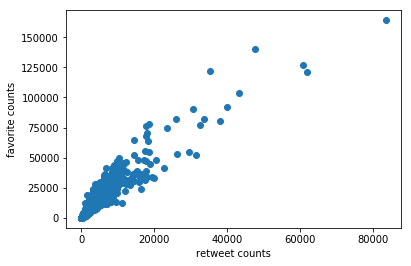

In [118]:
#plot scatter for retweet count and favorite count 
plt.scatter(df_score['retweet_count'],df_score['favorite_count'])
plt.xlabel('retweet counts')
plt.ylabel('favorite counts')

In [119]:
#run linear regression between the two variables 
df_score['intercept']=1
lm=sm.OLS(df_score['favorite_count'],df_score[['intercept','retweet_count']])
results=lm.fit()
results.summary()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         favorite_count   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                 1.186e+04
Date:                Sun, 27 Jan 2019   Prob (F-statistic):               0.00
Time:                        19:08:32   Log-Likelihood:                -18511.
No. Observations:                1871   AIC:                         3.703e+04
Df Residuals:                    1869   BIC:                         3.704e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
intercept      2163.4641    127.194     17.009      0.000    1914.006    2412.922
retweet_count     2.5079      0.023    108.918      0.000       2.463       2.553
==============================================================================
Omnibus:                      485.737   Durbin-Watson:                   0.758
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14212.489
Skew:                           0.578   Prob(JB):                         0.00
Kurtosis:                      16.453   Cond. No.                     6.34e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.34e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1959 entries, 0 to 1960
Data columns (total 21 columns):
tweet_id              1959 non-null int64
timestamp             1959 non-null datetime64[ns]
source                1959 non-null object
text                  1959 non-null object
rating_numerator      1959 non-null int64
rating_denominator    1959 non-null int64
name                  1959 non-null object
jpg_url               1959 non-null object
img_num               1959 non-null int64
predict1              1959 non-null object
p1_conf               1959 non-null float64
p1_dog                1959 non-null bool
predict2              1959 non-null object
p2_conf               1959 non-null float64
p2_dog                1959 non-null bool
predict3              1959 non-null object
p3_conf               1959 non-null float64
p3_dog                1959 non-null bool
dog_type              1959 non-null object
retweet_count         1959 non-null float64
favorite_count        1959 non-

In [121]:
df_score['p1_dog_conf']=df_score['p1_conf']*df_score['p1_dog'].astype(int)


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [122]:
df_score.describe()

,tweet_id,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,retweet_count,favorite_count,intercept,p1_dog_conf
count,1.871000e+03,1871.000000,1871.0,1871.000000,1871.000000,1.871000e+03,1.871000e+03,1871.000000,1871.000000,1871.0,1871.000000
mean,7.378651e+17,10.825227,10.0,1.211117,0.595852,1.357344e-01,6.027983e-02,2707.865847,8954.471940,1.0,0.468701
std,6.783005e+16,1.666892,0.0,0.570021,0.270996,1.017335e-01,5.112929e-02,4816.131563,12994.960453,0.0,0.345876
min,6.660209e+17,6.000000,10.0,1.000000,0.044333,1.011300e-08,1.740170e-10,12.000000,78.000000,1.0,0.000000
25%,6.767941e+17,10.000000,10.0,1.000000,0.367121,5.409535e-02,1.619495e-02,597.000000,1984.500000,1.0,0.139893
50%,7.108446e+17,11.000000,10.0,1.000000,0.594333,1.192560e-01,4.921790e-02,1314.000000,4032.000000,1.0,0.479008
75%,7.911498e+17,12.000000,10.0,1.000000,0.845270,1.965655e-01,9.180755e-02,3106.000000,11235.500000,1.0,0.783195
max,8.924206e+17,14.000000,10.0,4.000000,1.000000,4.880140e-01,2.734190e-01,83492.000000,164048.000000,1.0,0.999956


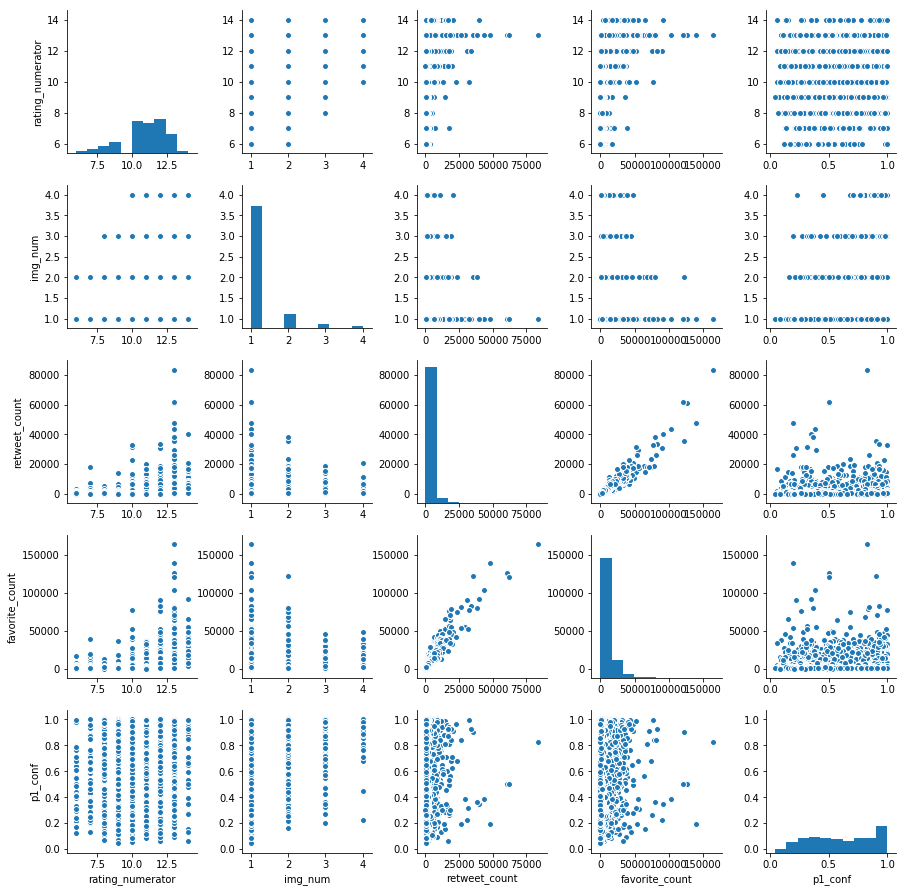

In [123]:
#run all pair of numeric variables 
sns.pairplot(df_score[['rating_numerator', 'img_num','retweet_count','favorite_count','p1_conf']])

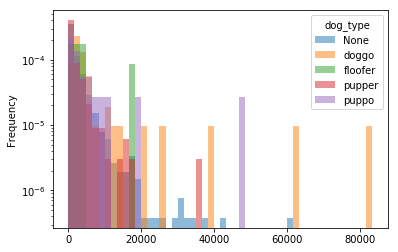

In [124]:
# P1 True and P1 False histogram


#df['N'].hist(by=df['Letter'])
#titanic.pivot(columns='Survived').Age.plot(kind = 'hist', stacked=True)
#df['retweet_count'].hist(by=df['p1_dog'],log=True,bins=50)
df_score.pivot(columns='dog_type').retweet_count.plot(kind='hist',stacked=False,bins=50,density=1,log=True, alpha=0.5)

In [125]:
df_score[['dog_type','rating_numerator', ]].groupby('dog_type').describe()

rating_numerator                                                    
                    count       mean       std   min    25%   50%   75%   max
dog_type                                                                     
None               1581.0  10.776724  1.666533   6.0  10.00  11.0  12.0  14.0
doggo                63.0  11.888889  1.471351   8.0  11.00  12.0  13.0  14.0
floofer               7.0  12.000000  1.154701  10.0  11.50  12.0  13.0  13.0
pupper              198.0  10.702020  1.611222   6.0  10.00  11.0  12.0  14.0
puppo                22.0  12.000000  1.309307   9.0  11.25  12.0  13.0  14.0

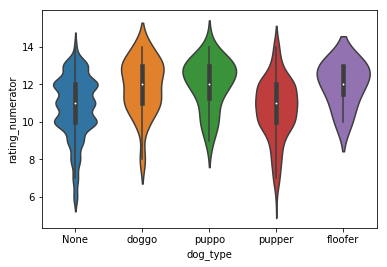

In [126]:
#visulization of violin chart to compare dog types 
sns.violinplot(x="dog_type", y="rating_numerator",  data=df_score);

In [127]:
#check data to compare dog types 
df_score[['dog_type','favorite_count' ]].groupby('dog_type').describe()


favorite_count                                                        \
                  count          mean           std     min      25%      50%   
dog_type                                                                        
None             1581.0   8552.775459  11622.426703    78.0  1732.00   3908.0   
doggo              63.0  20050.015873  27042.808621  2467.0  7906.00  11802.0   
floofer             7.0  12652.285714  10819.219545  2167.0  4791.50  10744.0   
pupper            198.0   7078.252525  11343.514383   660.0  2334.75   3114.0   
puppo              22.0  21757.636364  29724.497818  3113.0  6730.25  12864.0   

                              
               75%       max  
dog_type                      
None      11004.00  126852.0  
doggo     19702.00  164048.0  
floofer   17085.00   31902.0  
pupper     7574.25  121783.0  
puppo     18962.75  140191.0

In [128]:
df_score[['dog_type','retweet_count' ]].groupby('dog_type').describe()

retweet_count                                                    \
                 count         mean           std    min     25%     50%   
dog_type                                                                   
None            1581.0  2530.889943   4000.945363   12.0   559.0  1262.0   
doggo             63.0  7054.492063  13669.836277  680.0  1925.0  3124.0   
floofer            7.0  4675.000000   5783.604153  468.0  1721.0  3079.0   
pupper           198.0  2272.585859   3597.882052   96.0   652.0  1145.5   
puppo             22.0  6270.454545  10148.667390  664.0  1611.0  2946.0   

                            
              75%      max  
dog_type                    
None      3028.00  60883.0  
doggo     5129.00  83492.0  
floofer   4185.50  17365.0  
pupper    2358.75  35380.0  
puppo     5914.50  47623.0

In [129]:
#create time from time column 
def get_hour(x):
    return x.hour
df_score.loc[:,'hour'] = df_score['timestamp'].apply(get_hour)

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [130]:
def get_dayofweek(x):
    return x.dayofweek
df_score.loc[:,'dayofweek'] = df_score['timestamp'].apply(get_dayofweek)

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [131]:
def get_month(x):
    return x.month
df_score.loc[:,'month'] = df_score['timestamp'].apply(get_month)

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [132]:
def get_year_month(x):
    return str(x.year)+'-'+str(x.month)
df_score.loc[:,'year_month']=df_score['timestamp'].apply(get_year_month)


/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [133]:
min_timestamp = df_score['timestamp'].min()
min_timestamp

Timestamp('2015-11-15 22:32:08')

In [134]:
df_score['timestamp'].head(5)

0   2017-08-01 16:23:56
1   2017-08-01 00:17:27
2   2017-07-31 00:18:03
3   2017-07-30 15:58:51
4   2017-07-29 16:00:24
Name: timestamp, dtype: datetime64[ns]

In [135]:
#create week from begin for the purpose of running timeseries analysis 
def get_week(x):
    diff = x - min_timestamp
    return math.floor(diff.days/7)
df_score['week_from_begin']=df_score['timestamp'].apply(get_week)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [136]:
df_score[df_score['week_from_begin']==55]

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,jpg_url,img_num,predict1,...,dog_type,retweet_count,favorite_count,intercept,p1_dog_conf,hour,dayofweek,month,year_month,week_from_begin
391,808001312164028416,2016-12-11 17:31:39,iPhone,This is Cooper. He likes to stick his tongue o...,12,10,Cooper,https://pbs.twimg.com/media/CzaY5UdUoAAC91S.jpg,1,Labrador Retriever,...,None,3872.0,13434.0,1,0.730959,17,6,12,2016-12,55
392,807621403335917568,2016-12-10 16:22:02,iPhone,This is Ollie Vue. He was a 3 legged pupper on...,14,10,Ollie,https://pbs.twimg.com/media/CzU_YVGUUAA3Xsd.jpg,3,Golden Retriever,...,pupper,4026.0,15560.0,1,0.873233,16,5,12,2016-12,55
393,807106840509214720,2016-12-09 06:17:20,iPhone,This is Stephan. He just wants to help. 13/10 ...,13,10,Stephan,https://pbs.twimg.com/ext_tw_video_thumb/80710...,1,Chihuahua,...,None,60883.0,126852.0,1,0.505370,6,4,12,2016-12,55
394,807010152071229440,2016-12-08 23:53:08,iPhone,This is Lennon. He's a Boopershnoop Pupperdoop...,12,10,Lennon,https://pbs.twimg.com/media/CzMTcZoXUAEKqEt.jpg,1,Golden Retriever,...,None,4193.0,13935.0,1,0.610807,23,3,12,2016-12,55
395,806629075125202948,2016-12-07 22:38:52,iPhone,"""Good afternoon class today we're going to lea...",13,10,None,https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg,2,Arabian Camel,...,None,38171.0,80253.0,1,0.000000,22,2,12,2016-12,55
396,806542213899489280,2016-12-07 16:53:43,iPhone,This is Waffles. He's concerned that the dandr...,11,10,Waffles,https://pbs.twimg.com/media/CzFp3FNW8AAfvV8.jpg,1,Vizsla,...,None,2592.0,10914.0,1,0.938617,16,2,12,2016-12,55
397,806219024703037440,2016-12-06 19:29:28,iPhone,We only rate dogs. Please stop sending in non-...,11,10,incredibly,https://pbs.twimg.com/media/CzBD7MWVIAA5ptx.jpg,1,Chow,...,None,1306.0,6864.0,1,0.835102,19,1,12,2016-12,55
398,805932879469572096,2016-12-06 00:32:26,iPhone,This is Major. He put on a tie for his first r...,12,10,Major,https://pbs.twimg.com/media/Cy8_qt0UUAAHuuN.jpg,1,Norwegian Elkhound,...,None,2092.0,8843.0,1,0.657967,0,1,12,2016-12,55
399,805826884734976000,2016-12-05 17:31:15,iPhone,This is Duke. He is not a fan of the pupporazz...,12,10,Duke,https://pbs.twimg.com/ext_tw_video_thumb/80582...,1,Siberian Husky,...,None,2007.0,7033.0,1,0.248926,17,0,12,2016-12,55


In [137]:
#DataFrame.sort(columns=None
df.sort_values(['favorite_count'],ascending=False)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,jpg_url,img_num,predict1,...,p1_dog,predict2,p2_conf,p2_dog,predict3,p3_conf,p3_dog,dog_type,retweet_count,favorite_count
761,744234799360020481,2016-06-18 18:26:18,iPhone,Here's a doggo realizing you can stand in a po...,13,10,None,https://pbs.twimg.com/ext_tw_video_thumb/74423...,1,Labrador Retriever,...,True,Ice Bear,0.044681,False,Whippet,0.018442,True,doggo,83492.0,164048.0
304,822872901745569793,2017-01-21 18:26:02,iPhone,Here's a super supportive puppo participating ...,13,10,None,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,1,Lakeland Terrier,...,True,Labrador Retriever,0.160329,True,Irish Terrier,0.069126,True,puppo,47623.0,140191.0
393,807106840509214720,2016-12-09 06:17:20,iPhone,This is Stephan. He just wants to help. 13/10 ...,13,10,Stephan,https://pbs.twimg.com/ext_tw_video_thumb/80710...,1,Chihuahua,...,True,Pomeranian,0.120358,True,Toy Terrier,0.077008,True,None,60883.0,126852.0
108,866450705531457537,2017-05-22 00:28:40,iPhone,This is Jamesy. He gives a kiss to every other...,13,10,Jamesy,https://pbs.twimg.com/media/DAZAUfBXcAAG_Nn.jpg,2,French Bulldog,...,True,Boston Bull,0.078060,True,Pug,0.001771,True,pupper,35380.0,121783.0
795,739238157791694849,2016-06-04 23:31:25,iPhone,Here's a doggo blowing bubbles. It's downright...,13,10,None,https://pbs.twimg.com/ext_tw_video_thumb/73923...,1,Eskimo Dog,...,True,Siberian Husky,0.390413,True,Malamute,0.080901,True,doggo,61834.0,121197.0
58,879415818425184262,2017-06-26 19:07:24,iPhone,This is Duddles. He did an attempt. 13/10 some...,13,10,Duddles,https://pbs.twimg.com/ext_tw_video_thumb/87941...,1,English Springer,...,True,Boston Bull,0.134967,True,Cardigan,0.110481,True,None,43361.0,103869.0
328,819004803107983360,2017-01-11 02:15:36,iPhone,This is Bo. He was a very good First Doggo. 14...,14,10,Bo,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,1,Standard Poodle,...,True,Toy Poodle,0.271929,True,Tibetan Terrier,0.094759,True,doggo,40012.0,92046.0
134,859196978902773760,2017-05-02 00:04:57,iPhone,We only rate dogs. This is quite clearly a smo...,12,10,None,https://pbs.twimg.com/ext_tw_video_thumb/85919...,1,Angora,...,False,Malamute,0.216163,True,Persian Cat,0.128383,False,None,30722.0,90588.0
1399,678399652199309312,2015-12-20 02:20:55,iPhone,This made my day. 12/10 please enjoy https://t...,12,10,None,https://pbs.twimg.com/ext_tw_video_thumb/67839...,1,Swing,...,False,Bedlington Terrier,0.015047,True,Great Pyrenees,0.014039,True,None,33724.0,82298.0
93,870374049280663552,2017-06-01 20:18:38,iPhone,This is Zoey. She really likes the planet. Wou...,13,10,Zoey,https://pbs.twimg.com/media/DBQwlFCXkAACSkI.jpg,1,Golden Retriever,...,True,Great Pyrenees,0.099278,True,Labrador Retriever,0.032621,True,None,26050.0,81829.0


In [138]:
week_mean=df_score[['favorite_count','week_from_begin']].groupby('week_from_begin').mean()
week_sum=df_score[['favorite_count','week_from_begin']].groupby('week_from_begin').max()

Text(0,0.5,'mean favorite counts')

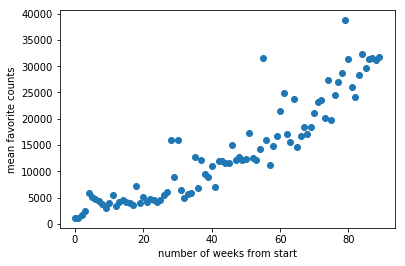

In [139]:
#mean favorite counts over time 
plt.scatter(week_mean.index,week_mean['favorite_count'])
plt.xlabel('number of weeks from start')
plt.ylabel('mean favorite counts')

Text(0,0.5,'mean favorite counts')

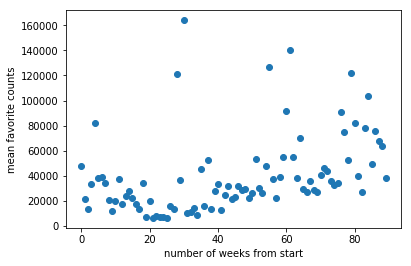

In [140]:
plt.scatter(week_sum.index,week_sum['favorite_count'])
plt.xlabel('number of weeks from start')
plt.ylabel('mean favorite counts')

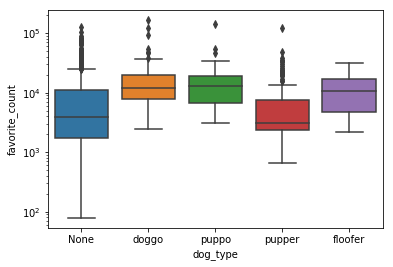

In [141]:
#violin chart on dog types impact to favorite counts
ax = sns.boxplot(x="dog_type", y="favorite_count",  data=df_score)
ax.set_yscale('log')


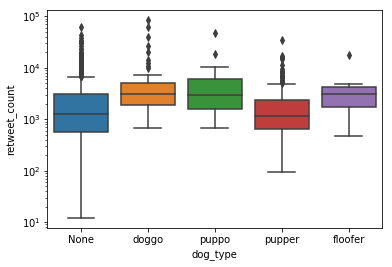

In [142]:
ax = sns.boxplot(x="dog_type", y="retweet_count",  data=df_score);
ax.set_yscale('log')


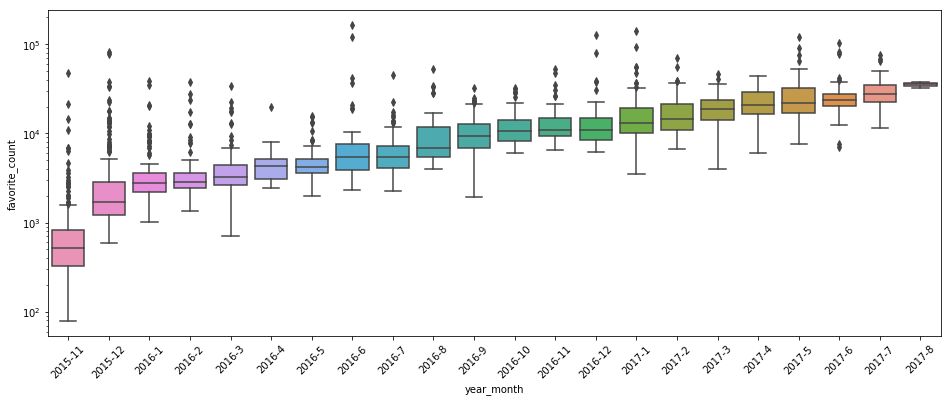

In [143]:
#time series on median of favorite counts in log 
plt.figure(figsize=(16, 6))

ax = sns.boxplot(x="year_month", y="favorite_count", data=df_score);
ax.set_yscale('log')
plt.xticks(rotation=45)
plt.gca().invert_xaxis()

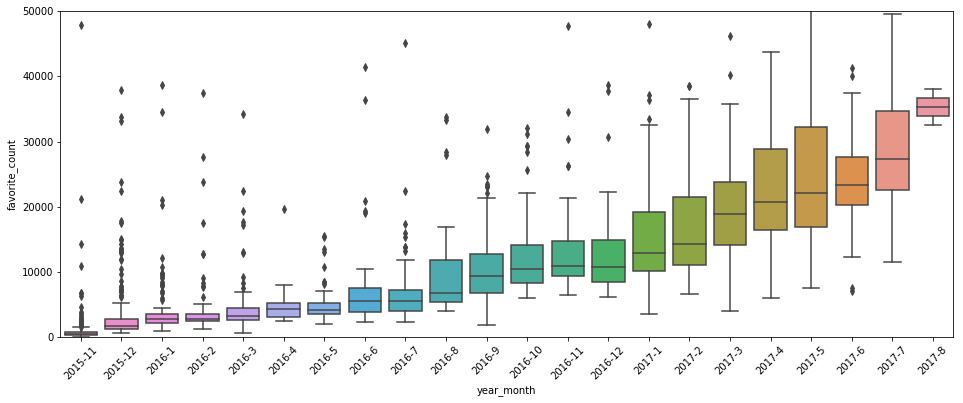

In [144]:
#timeseries on median of favorite counts on linear scale 
plt.figure(figsize=(16, 6))

ax = sns.boxplot(x="year_month", y="favorite_count", data=df_score);
plt.ylim((0, 50000))   
plt.xticks(rotation=45)
plt.gca().invert_xaxis()

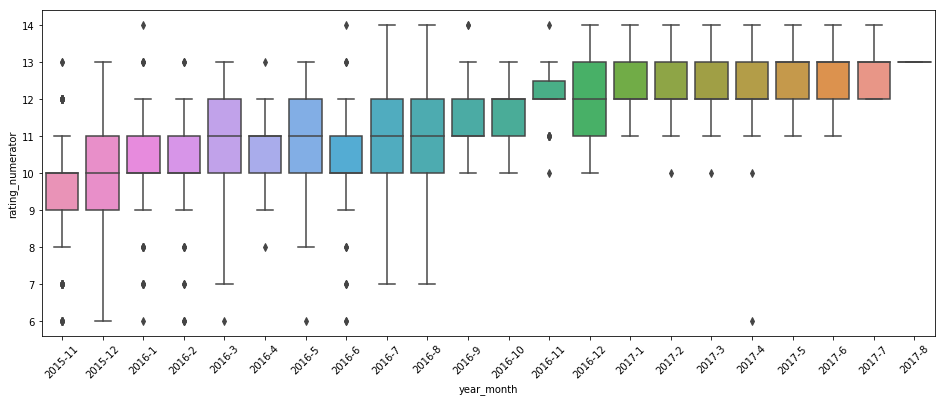

In [145]:
#time series on score over time 
plt.figure(figsize=(16, 6))

ax = sns.boxplot(x="year_month", y="rating_numerator", data=df_score);
plt.xticks(rotation=45)
plt.gca().invert_xaxis()

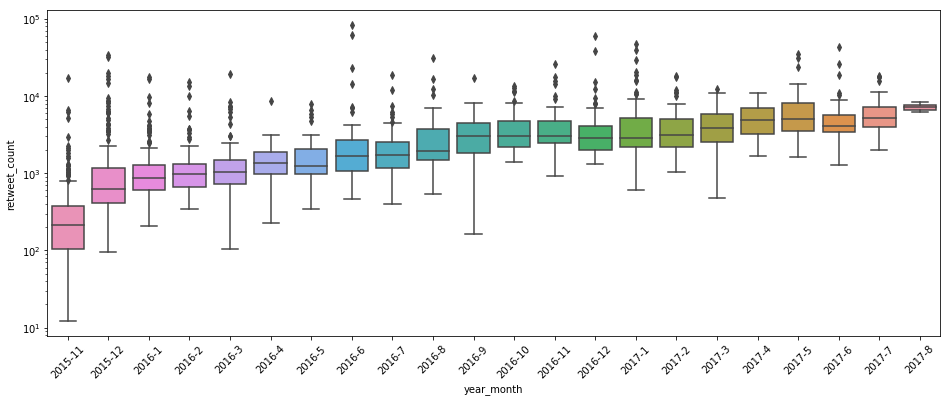

In [146]:
#time series on retweet counts over time 
plt.figure(figsize=(16, 6))

ax = sns.boxplot(x="year_month", y="retweet_count", data=df_score);
plt.xticks(rotation=45)
ax.set_yscale('log')
plt.gca().invert_xaxis()

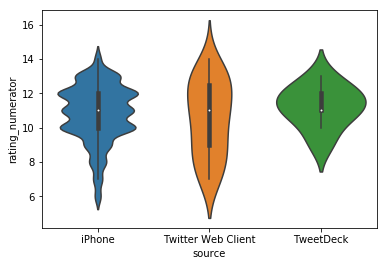

In [147]:
#violin chart of source impact on score
sns.violinplot(x="source", y="rating_numerator",  data=df_score)

In [148]:
df_score[df_score['source']=='Twitter Web Client']

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,jpg_url,img_num,predict1,...,dog_type,retweet_count,favorite_count,intercept,p1_dog_conf,hour,dayofweek,month,year_month,week_from_begin
158,852226086759018497,2017-04-12 18:25:07,Twitter Web Client,Meet General. He wasn't content with the quali...,14,10,General,https://pbs.twimg.com/ext_tw_video_thumb/85222...,1,Prison,...,None,7090.0,20509.0,1,0.000000,18,2,4,2017-4,73
202,841314665196081154,2017-03-13 15:47:01,Twitter Web Client,This is Max. There's no way in h*ck you're tak...,13,10,Max,https://pbs.twimg.com/ext_tw_video_thumb/84131...,1,Afghan Hound,...,None,4998.0,16508.0,1,0.903712,15,0,3,2017-3,69
256,831315979191906304,2017-02-14 01:35:49,Twitter Web Client,I couldn't make it to the #WKCDogShow BUT I ha...,13,10,None,https://pbs.twimg.com/media/C4lst0bXAAE6MP8.jpg,4,Briard,...,pupper,1202.0,6870.0,1,0.982755,1,1,2,2017-2,65
570,772877495989305348,2016-09-05 19:22:09,Twitter Web Client,You need to watch these two doggos argue throu...,11,10,None,https://pbs.twimg.com/ext_tw_video_thumb/77287...,1,Tabby,...,None,4200.0,9105.0,1,0.000000,19,0,9,2016-9,42
593,768970937022709760,2016-08-26 00:38:52,Twitter Web Client,This is Kirby. His bowl weighs more than him. ...,12,10,Kirby,https://pbs.twimg.com/ext_tw_video_thumb/76896...,1,Pomeranian,...,None,7087.0,15264.0,1,0.182358,0,4,8,2016-8,40
637,760290219849637889,2016-08-02 01:44:48,Twitter Web Client,This is Rocco. He's doing his best. 13/10 some...,13,10,Rocco,https://pbs.twimg.com/ext_tw_video_thumb/76028...,1,Old English Sheepdog,...,None,12396.0,28357.0,1,0.302200,1,1,8,2016-8,37
724,748705597323898880,2016-07-01 02:31:39,Twitter Web Client,#BarkWeek is getting rather heckin terrifying ...,13,10,None,https://pbs.twimg.com/ext_tw_video_thumb/74870...,1,Tiger Shark,...,None,1017.0,2904.0,1,0.000000,2,4,7,2016-7,32
767,743510151680958465,2016-06-16 18:26:48,Twitter Web Client,"This is Beya. She doesn't want to swim, so she...",13,10,Beya,https://pbs.twimg.com/ext_tw_video_thumb/74350...,1,Sea Lion,...,None,3945.0,8281.0,1,0.000000,18,3,6,2016-6,30
1488,675354435921575936,2015-12-11 16:40:19,Twitter Web Client,Everyone needs to watch this. 13/10 https://t....,13,10,None,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,Upright,...,None,17964.0,33704.0,1,0.000000,16,4,12,2015-12,3
1863,667773195014021121,2015-11-20 18:35:10,Twitter Web Client,This is a rare Hungarian Pinot named Jessiga. ...,8,10,None,https://pbs.twimg.com/media/CURoLrOVEAAaWdR.jpg,1,West Highland White Terrier,...,None,58.0,237.0,1,0.360465,18,4,11,2015-11,0


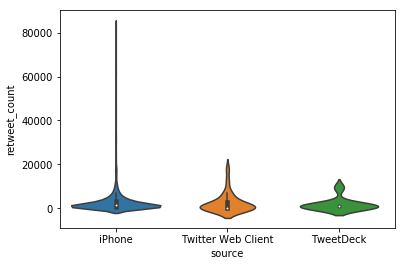

In [149]:
sns.violinplot(x="source", y="retweet_count",  data=df_score)

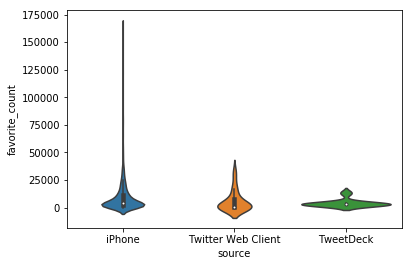

In [150]:
sns.violinplot(x="source", y="favorite_count",  data=df_score)

In [151]:
df_score.source.value_counts()

iPhone                1835
Twitter Web Client      27
TweetDeck                9
Name: source, dtype: int64

Text(0.5,1,'source Vs. tweet counts')

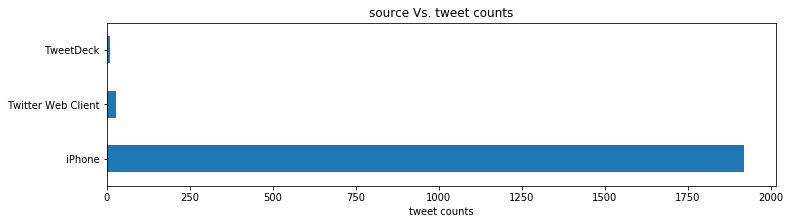

In [152]:
#histogram by source
df.source.value_counts().plot(kind='barh',subplots=True, figsize=(12, 3))
plt.xlabel('tweet counts')
plt.title('source Vs. tweet counts')

In [153]:
def get_time(x):
    return (x.year-2015)*12+x.month
df_score.loc[:,'time']=df_score['timestamp'].apply(get_time)

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [154]:
df_score['time']

0       32
1       32
2       31
3       31
4       31
5       31
6       31
7       31
8       31
9       31
10      31
11      31
12      31
13      31
14      31
15      31
16      31
17      31
18      31
19      31
20      31
21      31
22      31
23      31
24      31
25      31
26      31
27      31
28      31
29      31
        ..
1925    11
1926    11
1927    11
1928    11
1929    11
1930    11
1932    11
1933    11
1934    11
1935    11
1936    11
1937    11
1938    11
1941    11
1942    11
1944    11
1945    11
1946    11
1947    11
1948    11
1949    11
1950    11
1951    11
1952    11
1953    11
1955    11
1957    11
1958    11
1959    11
1960    11
Name: time, Length: 1871, dtype: int64

In [155]:
df[df['rating_numerator']==420]

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,jpg_url,img_num,predict1,...,p1_dog,predict2,p2_conf,p2_dog,predict3,p3_conf,p3_dog,dog_type,retweet_count,favorite_count
1686,670842764863651840,2015-11-29 05:52:33,iPhone,After so many requests... here you go.\n\nGood...,420,10,None,https://pbs.twimg.com/media/CU9P717W4AAOlKx.jpg,1,Microphone,...,False,Accordion,0.094075,False,Drumstick,0.061113,False,None,8954.0,24915.0


In [156]:
df_score['source'].value_counts()

iPhone                1835
Twitter Web Client      27
TweetDeck                9
Name: source, dtype: int64

In [157]:
df_score['dog_type'].value_counts()

None       1581
pupper      198
doggo        63
puppo        22
floofer       7
Name: dog_type, dtype: int64

In [158]:
newset=pd.get_dummies(df_score,columns=['source'])

In [159]:
newset.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,jpg_url,img_num,predict1,p1_conf,...,p1_dog_conf,hour,dayofweek,month,year_month,week_from_begin,time,source_TweetDeck,source_Twitter Web Client,source_iPhone
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,Orange,0.097049,...,0.000000,16,1,8,2017-8,89,32,0,0,1
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13,10,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,...,0.323581,0,1,8,2017-8,89,32,0,0,1
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,...,0.716012,0,0,7,2017-7,89,31,0,0,1
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,13,10,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Paper Towel,0.170278,...,0.000000,15,6,7,2017-7,88,31,0,0,1
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,12,10,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,Basset,0.555712,...,0.555712,16,5,7,2017-7,88,31,0,0,1


In [160]:
#linear regression on picked numeric variables 

newset['intercept']=1
lm=sm.OLS(newset['rating_numerator'],newset[['intercept','retweet_count','img_num','time','source_Twitter Web Client','source_iPhone']])
results=lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       rating_numerator   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.368
Method:                 Least Squares   F-statistic:                     219.1
Date:                Sun, 27 Jan 2019   Prob (F-statistic):          3.49e-184
Time:                        19:08:46   Log-Likelihood:                -3178.0
No. Observations:                1871   AIC:                             6368.
Df Residuals:                    1865   BIC:                             6401.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
intercept                     8.4795      0.453     18.734      0.000       7.592       9.367
retweet_count              4.394e-05   6.89e-06      6.377      0.000    3.04e-05    5.74e-05
img_num                       0.2353      0.055      4.280      0.000       0.128       0.343
time                          0.1424      0.005     25.951      0.000       0.132       0.153
source_Twitter Web Client    -0.3822      0.510     -0.749      0.454      -1.383       0.618
source_iPhone                -0.5552      0.443     -1.254      0.210      -1.423       0.313
==============================================================================
Omnibus:                      146.313   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              206.708
Skew:                          -0.636   Prob(JB):                     1.30e-45
Kurtosis:                       4.017   Cond. No.                     1.41e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [161]:
#try different variable combination to see if we can get a well fitted model. 

newset['intercept']=1
lm=sm.OLS(newset['rating_numerator'],newset[['intercept','favorite_count','retweet_count','img_num','time','source_Twitter Web Client','source_iPhone']])
results=lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       rating_numerator   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.368
Method:                 Least Squares   F-statistic:                     182.6
Date:                Sun, 27 Jan 2019   Prob (F-statistic):          4.74e-183
Time:                        19:08:46   Log-Likelihood:                -3177.9
No. Observations:                1871   AIC:                             6370.
Df Residuals:                    1864   BIC:                             6409.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
intercept                     8.4296      0.463     18.222      0.000       7.522       9.337
favorite_count            -5.046e-06   9.63e-06     -0.524      0.600   -2.39e-05    1.38e-05
retweet_count              5.505e-05   2.23e-05      2.468      0.014    1.13e-05    9.88e-05
img_num                       0.2329      0.055      4.222      0.000       0.125       0.341
time                          0.1456      0.008     17.710      0.000       0.129       0.162
source_Twitter Web Client    -0.3740      0.510     -0.733      0.464      -1.375       0.627
source_iPhone                -0.5434      0.443     -1.226      0.221      -1.413       0.326
==============================================================================
Omnibus:                      146.490   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              207.139
Skew:                          -0.636   Prob(JB):                     1.05e-45
Kurtosis:                       4.019   Cond. No.                     4.27e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.27e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [162]:
#try different variable combination to see if we can get a well fitted model. 
df_score['intercept']=1
lm=sm.OLS(df_score['rating_numerator'],df_score[['intercept','favorite_count','retweet_count','img_num','time']])
results=lm.fit()
results.summary()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       rating_numerator   R-squared:                       0.369
Model:                            OLS   Adj. R-squared:                  0.368
Method:                 Least Squares   F-statistic:                     273.4
Date:                Sun, 27 Jan 2019   Prob (F-statistic):          4.50e-185
Time:                        19:08:46   Log-Likelihood:                -3178.9
No. Observations:                1871   AIC:                             6368.
Df Residuals:                    1866   BIC:                             6395.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
intercept          7.8901      0.128     61.480      0.000       7.638       8.142
favorite_count -5.812e-06   9.62e-06     -0.604      0.546   -2.47e-05    1.31e-05
retweet_count   5.674e-05   2.23e-05      2.548      0.011    1.31e-05       0.000
img_num            0.2325      0.055      4.214      0.000       0.124       0.341
time               0.1458      0.008     17.752      0.000       0.130       0.162
==============================================================================
Omnibus:                      146.659   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              207.483
Skew:                          -0.636   Prob(JB):                     8.82e-46
Kurtosis:                       4.021   Cond. No.                     7.06e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.06e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Random Forest regression

In [163]:
print("MSE total of linear regression:{}".format(results.mse_total))
print("MSE residual of linear regression:{}".format(results.mse_resid))
#print(dir(results))
print("R^2 of linear regression:{}".format(1-results.mse_resid/results.mse_total))

MSE total of linear regression:2.778529025914822
MSE residual of linear regression:1.755651694815118
R^2 of linear regression:0.36813627698667817


In [164]:
# Import the model we are using
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor


In [165]:
#run a random forest regression on training data and test the acuracy with test data.
labels = np.array(newset['rating_numerator'])
features= np.array(newset[['favorite_count','retweet_count','img_num','time','source_Twitter Web Client','source_iPhone']])
feature_list = ['favorite_count','retweet_count','img_num','time','source_Twitter Web Client','source_iPhone']

train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.2, random_state = 42)

print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 10, random_state = 12, max_leaf_nodes = 4)
# Train the model on training data
rf.fit(train_features, train_labels);
predictions = rf.predict(test_features)
errors = abs(predictions - test_labels)
print('Mean Absolute Error:', round(np.mean(errors), 2))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')


Training Features Shape: (1496, 6)
Training Labels Shape: (1496,)
Testing Features Shape: (375, 6)
Testing Labels Shape: (375,)
Mean Absolute Error: 1.04
Accuracy: 89.13 %.


In [166]:
#compare the mean square error for linear vs. random forest regression 
from sklearn.metrics import mean_squared_error

mse_test = mean_squared_error(test_labels, predictions)

print("MSE of linear regression:{}".format(results.mse_resid))
print("MSE of random forrest prediction:{}".format(mse_test))

MSE of linear regression:1.755651694815118
MSE of random forrest prediction:1.8815300418556447


In [167]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = feature_list,
                                    columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
time,0.722949
favorite_count,0.246521
retweet_count,0.030529
img_num,0.000000
source_Twitter Web Client,0.000000
source_iPhone,0.000000


Text(0.5,0,'Relative Importance')

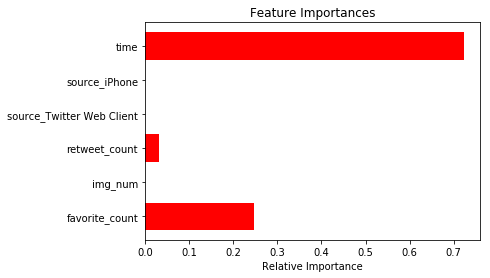

In [168]:
#plot the feature importance
importances = rf.feature_importances_

plt.figure(1)
plt.title('Feature Importances')
plt.barh(feature_list, importances, color='r', align='center')
plt.xlabel('Relative Importance')


In [169]:
#plot a decision tree picture
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[0]
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[0]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')